<a href="https://colab.research.google.com/github/JohnCubides/ArtificialIntelligence/blob/main/Actividad_%202_BusquedaSistemasBasadosReglas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Importar librerias

import numpy as np #metodos numericos
import pandas as pd #Manejo datos
import matplotlib.pyplot as plt #Gráfica
import seaborn as sns #Grágica

In [81]:
#Get Data
df = pd.read_csv('https://raw.githubusercontent.com/julihdez36/Inteligencia_artificial/main/Forbes%202000%202022.csv',sep=';')

In [82]:
# AED
df.shape

(2000, 8)

In [83]:
df.columns

Index(['Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/12/22 ($m)', 'Unnamed: 7'],
      dtype='object')

In [84]:
#Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rank                               2000 non-null   int64  
 1   Company Name                       2000 non-null   object 
 2   Country                            2000 non-null   object 
 3   Sales
($millions)                  2000 non-null   object 
 4   Profits
($millions)                2000 non-null   object 
 5   Assets
($millions)                 2000 non-null   object 
 6   Market Value 
As of 05/12/22 ($m)  2000 non-null   object 
 7   Unnamed: 7                         0 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


In [85]:
#clear Data
df = df.drop(df.columns[7], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Rank                               2000 non-null   int64 
 1   Company Name                       2000 non-null   object
 2   Country                            2000 non-null   object
 3   Sales
($millions)                  2000 non-null   object
 4   Profits
($millions)                2000 non-null   object
 5   Assets
($millions)                 2000 non-null   object
 6   Market Value 
As of 05/12/22 ($m)  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [86]:
#Define Tittle
columnName = ['Rank', 'Name', 'Country', 'Sales', 'Profits', 'Assets', 'MarketValue']
df.columns = columnName
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         2000 non-null   int64 
 1   Name         2000 non-null   object
 2   Country      2000 non-null   object
 3   Sales        2000 non-null   object
 4   Profits      2000 non-null   object
 5   Assets       2000 non-null   object
 6   MarketValue  2000 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [87]:
#Change DataTyping (coerción stadistica)
df.replace(to_replace=",", value='', regex=True, inplace=True )
df.replace(to_replace="\$", value='', regex=True, inplace=True )
df.iloc[:,3:] = df.iloc[:,3:].astype(float)
df.sample(5)

<ipython-input-87-dfa82c3267e3>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,3:] = df.iloc[:,3:].astype(float)


,Rank,Name,Country,Sales,Profits,Assets,MarketValue
1203,1204,Beiersdorf,Germany,9020.0,754.0,13000.0,23470.0
972,973,Sasol,South Africa,15540.0,644.0,24700.0,15280.0
308,309,Blackstone,United States,15470.0,5330.0,43340.0,132170.0
1667,1668,Twitter,United States,5080.0,-221.0,14060.0,39170.0
1537,1538,SinoPac Financial,Taiwan,2110.0,580.0,86120.0,7170.0


In [88]:
#top 10
df.head(10)

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
0,1,Berkshire Hathaway,United States,276090.0,89800.0,958780.0,741480.0
1,2,ICBC,China,208130.0,54030.0,5518510.0,214430.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,400380.0,105360.0,576040.0,2292080.0
3,4,JPMorgan Chase,United States,124540.0,42120.0,3954690.0,374450.0
4,5,China Construction Bank,China,202070.0,46890.0,4746950.0,181320.0
5,6,Amazon,United States,469820.0,33360.0,420550.0,1468400.0
6,7,Apple,United States,378700.0,100560.0,381190.0,2640320.0
7,8,Agricultural Bank of China,China,181420.0,37380.0,4561050.0,133380.0
8,9,Bank of America,United States,96830.0,31000.0,3238220.0,303100.0
9,10,Toyota Motor,Japan,281750.0,28150.0,552460.0,237730.0


In [89]:
#Tablas Frecuencias
ni = df.Country.value_counts() #Frecuecnia absoluta
fi = df.Country.value_counts(normalize=True)*100 #frecuencia relativa
Fi = fi.cumsum()
table_frec = pd.DataFrame({'ni':ni,'fi': fi, 'Fi': Fi})
table_frec['Country'] = table_frec.index
table_frec

,ni,fi,Fi,Country
United States,590,29.50,29.50,United States
China,297,14.85,44.35,China
Japan,196,9.80,54.15,Japan
South Korea,65,3.25,57.40,South Korea
United Kingdom,64,3.20,60.60,United Kingdom
Canada,58,2.90,63.50,Canada
India,55,2.75,66.25,India
France,54,2.70,68.95,France
Hong Kong,54,2.70,71.65,Hong Kong
Germany,52,2.60,74.25,Germany


In [90]:
#top 10 paises
table_frec.head(10)

,ni,fi,Fi,Country
United States,590,29.50,29.50,United States
China,297,14.85,44.35,China
Japan,196,9.80,54.15,Japan
South Korea,65,3.25,57.40,South Korea
United Kingdom,64,3.20,60.60,United Kingdom
Canada,58,2.90,63.50,Canada
India,55,2.75,66.25,India
France,54,2.70,68.95,France
Hong Kong,54,2.70,71.65,Hong Kong
Germany,52,2.60,74.25,Germany


In [91]:
#Paises con menos empresas
table_frec.tail(10)

,ni,fi,Fi,Country
Morocco,2,0.10,99.50,Morocco
Kazakhstan,2,0.10,99.60,Kazakhstan
Cayman Islands,1,0.05,99.65,Cayman Islands
Egypt,1,0.05,99.70,Egypt
Argentina,1,0.05,99.75,Argentina
Czech Republic,1,0.05,99.80,Czech Republic
Bahrain,1,0.05,99.85,Bahrain
Uruguay,1,0.05,99.90,Uruguay
Peru,1,0.05,99.95,Peru
Nigeria,1,0.05,100.00,Nigeria


In [92]:
#Empresas en Colombia
df[ df.Country == 'Colombia' ]

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
294,295,Ecopetrol,Colombia,23430.0,4450.0,60010.0,36070.0
975,976,Bancolombia,Colombia,6080.0,1090.0,71220.0,10890.0
986,987,Grupo Aval,Colombia,10270.0,880.0,90150.0,4780.0


In [93]:
sud = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Perú", "Uruguay", "Venezuela"]
df[df.Country.isin(sud)]

,Rank,Name,Country,Sales,Profits,Assets,MarketValue
64,65,Petrobras,Brazil,83890.0,19770.0,174680.0,83980.0
117,118,Vale,Brazil,54400.0,22470.0,89610.0,82030.0
137,138,Itaú Unibanco Holding,Brazil,35960.0,4960.0,372300.0,52890.0
181,182,Banco Bradesco,Brazil,28330.0,4070.0,296890.0,43160.0
267,268,Banco do Brasil,Brazil,29540.0,3400.0,362530.0,20700.0
294,295,Ecopetrol,Colombia,23430.0,4450.0,60010.0,36070.0
399,400,JBS,Brazil,64990.0,3800.0,37180.0,17480.0
773,774,Banco Btg Pactual,Brazil,2710.0,848.0,68310.0,56140.0
832,833,Quinenco,Chile,8460.0,2490.0,72470.0,4840.0
904,905,AntarChile,Chile,24900.0,1210.0,25870.0,3490.0


In [94]:
table_sud = table_frec[table_frec.index.isin(sud)]

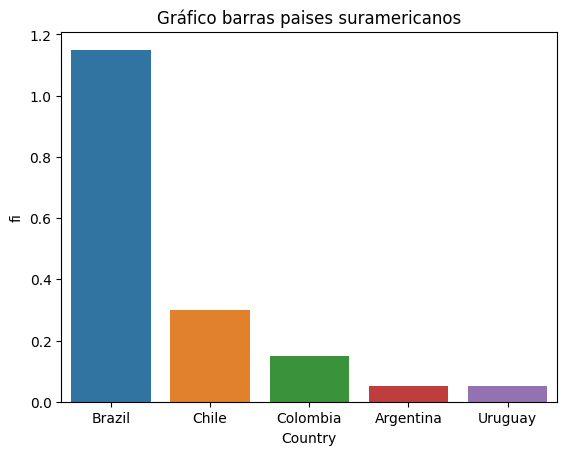

In [95]:
sns.barplot(table_sud, x='Country',y='fi')
plt.title('Gráfico barras paises suramericanos')
plt.show()

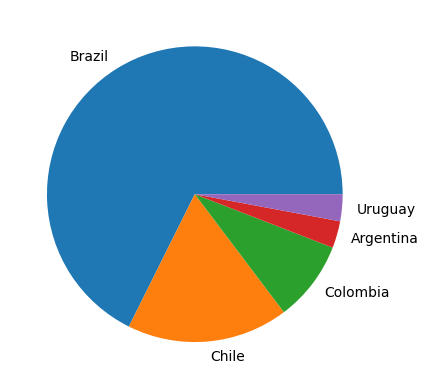

In [96]:
#Gráfico sectores
plt.pie(table_sud.fi, labels=table_sud.Country)
plt.show()

In [97]:
#Métodos numérocos
df.describe().round(2)

,Rank,Sales,Profits,Assets,MarketValue
count,2000.00,2000.00,2000.00,2000.00,2000.00
mean,1000.50,23876.04,2502.12,117035.24,38242.61
std,577.49,40943.90,6159.20,363742.61,117206.80
min,1.00,0.00,-12050.00,166.00,144.00
25%,500.75,5607.50,590.00,14797.50,7325.00
50%,1000.50,12170.00,1055.00,32010.00,16625.00
75%,1500.25,23725.00,2270.00,77815.00,34710.00
max,2000.00,572750.00,105360.00,5518510.00,2640320.00
